In [13]:
import pandas as pd

In [19]:
# 读取 CSV 文件
df = pd.read_csv("scraped-1.csv")

# 输出数据框前5行
df.head()

,Unnamed: 0,fname,text
0,0,cards ace of cups,cards ace of cups. Ace of Cups Tarot Card Me...
1,1,cards page of wands,cards page of wands. Page of Wands Tarot Car...
2,2,cards six of pentacles,cards six of pentacles. Six of Pentacles Tar...
3,3,cards the star,cards the star. The Star Tarot Card Meaning ...
4,4,cards queen of swords,cards queen of swords. Queen of Swords Tarot...


<Axes: >

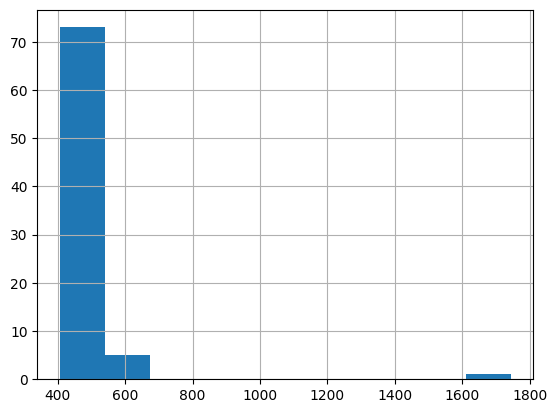

In [20]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('scraped-1.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [21]:
# 输出数据框前5行
df.head()

,title,text,n_tokens
0,cards ace of cups,cards ace of cups. Ace of Cups Tarot Card Me...,416
1,cards page of wands,cards page of wands. Page of Wands Tarot Car...,406
2,cards six of pentacles,cards six of pentacles. Six of Pentacles Tar...,451
3,cards the star,cards the star. The Star Tarot Card Meaning ...,422
4,cards queen of swords,cards queen of swords. Queen of Swords Tarot...,459


In [23]:
df.title.value_counts().head()

cards ace of cups           1
cards eight of pentacles    1
cards king of wands         1
cards wheel of fortune      1
cards the lovers            1
Name: title, dtype: int64

In [25]:
df.title.str.contains('cards').value_counts()
df.count()

title       79
text        79
n_tokens    79
dtype: int64

In [58]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace(r'\s+', ' ')
    return serie

In [71]:
import os
# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'
# Define root domain to crawl
domain = "trustedtarot.com"
full_url = "https://trustedtarot.com/cards"

# Create a list to store the text files
texts=[]
# Get all the text files in the text directory
for file in os.listdir("openai-cookbook/web-crawl-tarot/text/" + domain + "/"):

    # Open the file and read the text
    with open("openai-cookbook/web-crawl-tarot/text/" + domain + "/" + file, "r") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[17:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text.split("Copyright ©2010 - 2023")[0]))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = remove_newlines(df.text)
df.to_csv('scraped-processed.csv')
df.head()

/var/folders/73/0ln3ds41497gvfzlmq073p640000gn/T/ipykernel_21129/2537878337.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')
/var/folders/73/0ln3ds41497gvfzlmq073p640000gn/T/ipykernel_21129/2537878337.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace(r'\s+', ' ')


,fname,text
0,cards ace of cups,Ace of Cups Tarot Card Meaning Free Tarot Rea...
1,cards page of wands,Page of Wands Tarot Card Meaning Free Tarot R...
2,cards six of pentacles,Six of Pentacles Tarot Card Meaning Free Taro...
3,cards the star,The Star Tarot Card Meaning Free Tarot Readin...
4,cards queen of swords,Queen of Swords Tarot Card Meaning Free Tarot...


In [34]:
# Read in the data, and create a context

In [72]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('scraped-processed.csv', index_col=0)
df.columns = ['fname', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

df.head()

,fname,text,n_tokens
0,cards ace of cups,Ace of Cups Tarot Card Meaning Free Tarot Rea...,311
1,cards page of wands,Page of Wands Tarot Card Meaning Free Tarot R...,300
2,cards six of pentacles,Six of Pentacles Tarot Card Meaning Free Taro...,345
3,cards the star,The Star Tarot Card Meaning Free Tarot Readin...,318
4,cards queen of swords,Queen of Swords Tarot Card Meaning Free Tarot...,354


In [73]:
df.to_csv('scraped-processed.csv')
df.head()

,fname,text,n_tokens
0,cards ace of cups,Ace of Cups Tarot Card Meaning Free Tarot Rea...,311
1,cards page of wands,Page of Wands Tarot Card Meaning Free Tarot R...,300
2,cards six of pentacles,Six of Pentacles Tarot Card Meaning Free Taro...,345
3,cards the star,The Star Tarot Card Meaning Free Tarot Readin...,318
4,cards queen of swords,Queen of Swords Tarot Card Meaning Free Tarot...,354


In [74]:
import pandas as pd
df = pd.read_csv('scraped-processed.csv')
df['context'] = df.fname + "\n\n" + df.text
df.head()

,Unnamed: 0,fname,text,n_tokens,context
0,0,cards ace of cups,Ace of Cups Tarot Card Meaning Free Tarot Rea...,311,cards ace of cups\n\n Ace of Cups Tarot Card M...
1,1,cards page of wands,Page of Wands Tarot Card Meaning Free Tarot R...,300,cards page of wands\n\n Page of Wands Tarot Ca...
2,2,cards six of pentacles,Six of Pentacles Tarot Card Meaning Free Taro...,345,cards six of pentacles\n\n Six of Pentacles Ta...
3,3,cards the star,The Star Tarot Card Meaning Free Tarot Readin...,318,cards the star\n\n The Star Tarot Card Meaning...
4,4,cards queen of swords,Queen of Swords Tarot Card Meaning Free Tarot...,354,cards queen of swords\n\n Queen of Swords Taro...


In [75]:
import openai

def get_questions(context):
    try:
        response = openai.Completion.create(
            engine="davinci-instruct-beta-v3",
            prompt=f"Write questions based on the text below\n\nText: {context}\n\nQuestions:\n1.",
            temperature=0,
            max_tokens=257,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=["\n\n"]
        )
        return response['choices'][0]['text']
    except:
        return ""


df['questions']= df.context.apply(get_questions)
df['questions'] = "1." + df.questions
print(df[['questions']].values[0][0])

1. What does the Ace of Cups tarot card represent?
2. What does the Ace of Cups predict for the future?
3. What is the key interpretation of the Ace of Cups?
4. What are the key dates, timing, and astrology associated with the Ace of Cups?


In [77]:
print(df.context.values[0])

cards ace of cups

 Ace of Cups Tarot Card Meaning Free Tarot Reading Menu Tarot Card Meanings Tarot Cards Love Tarot Daily Tarot Reading Tarot Horoscope Biorhythms I Ching Runes Spirit Guides Tarot App Live Tarot Reading Log in Ace of Cups Abundance · Creativity · Intense relationship · Satisfaction · Success Ace of Cups Tarot card Ace of Cups's Meaning The Ace of Cups signifies the beginning of period of strong emotional health for you. Expect copious joy, happiness, and love to surround you during this time. Existing personal relationships may strengthen, meaningful new ones are likely to form. If marriage is in your future, you are likely to lay the foundations for it during this time. Past There have been numerous occasions that prove your creative talent and ability to succeed in your efforts. By being passionate and intensely focused, you have allowed for greater productivity. Present Good news is going to bring joy and extreme satisfaction to your life. Future The difficulties 

In [78]:
df.head()

,Unnamed: 0,fname,text,n_tokens,context,questions
0,0,cards ace of cups,Ace of Cups Tarot Card Meaning Free Tarot Rea...,311,cards ace of cups\n\n Ace of Cups Tarot Card M...,1. What does the Ace of Cups tarot card repres...
1,1,cards page of wands,Page of Wands Tarot Card Meaning Free Tarot R...,300,cards page of wands\n\n Page of Wands Tarot Ca...,1. What does the Page of Wands represent?\n2. ...
2,2,cards six of pentacles,Six of Pentacles Tarot Card Meaning Free Taro...,345,cards six of pentacles\n\n Six of Pentacles Ta...,1. What does the Six of Pentacles tarot card r...
3,3,cards the star,The Star Tarot Card Meaning Free Tarot Readin...,318,cards the star\n\n The Star Tarot Card Meaning...,1. What does the Star Tarot card represent?\n2...
4,4,cards queen of swords,Queen of Swords Tarot Card Meaning Free Tarot...,354,cards queen of swords\n\n Queen of Swords Taro...,1. What kind of person is the Queen of Swords?...


In [79]:
def get_answers(row):
    try:
        response = openai.Completion.create(
            engine="davinci-instruct-beta-v3",
            prompt=f"Write answer based on the text below\n\nText: {row.context}\n\nQuestions:\n{row.questions}\n\nAnswers:\n1.",
            temperature=0,
            max_tokens=257,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )
        return response['choices'][0]['text']
    except Exception as e:
        print (e)
        return ""


df['answers']= df.apply(get_answers, axis=1)
df['answers'] = "1." + df.answers
df = df.dropna().reset_index().drop('index',axis=1)
print(df[['answers']].values[0][0])

1. The Ace of Cups tarot card represents abundance, creativity, intense relationships, satisfaction, and success.
2. The Ace of Cups predicts success and abundance through good intuition and creativity. New relationships or a birth or pregnancy could be associated with these positive outlooks.
3. The key interpretation of the Ace of Cups is overall satisfaction throughout all different areas of your life. It predicts success and abundance through use of good intuition and creativity.
4. The key dates, timing, and astrology associated with the Ace of Cups are Cancer, Scorpio, and Pisces, all water signs significant in astrology.


In [80]:
df.to_csv('scraped_qa.csv', index=False)

In [ ]:
# Train a fine-tuning model specialized for Q&A

In [81]:
df = pd.read_csv('scraped_qa.csv')

In [82]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(test_df)

(63, 16)

In [83]:
df.context.str.contains('->').sum()

0

In [86]:
def create_fine_tuning_dataset(df, discriminator=False, n_negative=1, add_related=False):
    """
    Create a dataset for fine tuning the OpenAI model; either for a discriminator model, 
    or a model specializing in Q&A, where it says if no relevant context is found.

    Parameters
    ----------
    df: pd.DataFrame
        The dataframe containing the question, answer and context pairs
    discriminator: bool
        Whether to create a dataset for the discriminator
    n_negative: int
        The number of random negative samples to add (using a random context)
    add_related: bool
        Whether to add the related contexts to the correct context. These are hard negative examples

    Returns
    -------
    pd.DataFrame
        The dataframe containing the prompts and completions, ready for fine-tuning
    """
    rows = []
    for i, row in df.iterrows():
        for q, a in zip(("1." + row.questions).split('\n'), ("1." + row.answers).split('\n')):
            if len(q) >10 and len(a) >10:
                if discriminator:
                    rows.append({"prompt":f"{row.context}\nQuestion: {q[2:].strip()}\n Related:", "completion":f" yes"})
                else:
                    rows.append({"prompt":f"{row.context}\nQuestion: {q[2:].strip()}\nAnswer:", "completion":f" {a[2:].strip()}"})
    return pd.DataFrame(rows) 
        

for name, is_disc in [('discriminator', True), ('qa', False)]:
    for train_test, dt in [('train', train_df), ('test', test_df)]:
        ft = create_fine_tuning_dataset(dt, discriminator=is_disc, n_negative=1, add_related=True)
        ft.to_json(f'{name}_{train_test}.jsonl', orient='records', lines=True)



In [87]:
!openai tools fine_tunes.prepare_data -f qa_train.jsonl

Analyzing...

- Your file contains 311 prompt-completion pairs
- All prompts end with suffix `\nAnswer:`
- All prompts start with prefix `cards`
- All completions end with suffix `.`

No remediations found.

You can use your file for fine-tuning:
> openai api fine_tunes.create -t "qa_train.jsonl"

After you’ve fine-tuned a model, remember that your prompt has to end with the indicator string `\nAnswer:` for the model to start generating completions, rather than continuing with the prompt. Make sure to include `stop=["."]` so that the generated texts ends at the expected place.
Once your model starts training, it'll approximately take 6.71 minutes to train a `curie` model, and less for `ada` and `babbage`. Queue will approximately take half an hour per job ahead of you.


In [88]:
!openai api fine_tunes.create -t "discriminator_train.jsonl" -v "discriminator_test.jsonl" --batch_size 16

Upload progress: 100%|███████████████████████| 602k/602k [00:00<00:00, 355Mit/s]
Uploaded file from discriminator_train.jsonl: file-16Mj3VNQhbD3Ec4WGNsgi87A
Upload progress: 100%|███████████████████████| 142k/142k [00:00<00:00, 144Mit/s]
Uploaded file from discriminator_test.jsonl: file-tGKJAIL4ZwqlJlfdl4DU2YAI
Created fine-tune: ft-9OB2HPC0YxiiX72axpqj8gtL
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-03-30 23:17:06] Created fine-tune: ft-9OB2HPC0YxiiX72axpqj8gtL

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-9OB2HPC0YxiiX72axpqj8gtL



In [ ]:
!openai api fine_tunes.create -t "qa_train.jsonl" -v "qa_test.jsonl" \
-m curie \
--suffix "tarot_qa_demo" \
--batch_size 16 

In [93]:
!openai api fine_tunes.follow -i ft-9OB2HPC0YxiiX72axpqj8gtL

[2023-03-30 23:17:06] Created fine-tune: ft-9OB2HPC0YxiiX72axpqj8gtL
[2023-03-30 23:19:38] Fine-tune costs $1.48
[2023-03-30 23:19:38] Fine-tune enqueued. Queue number: 9
[2023-03-30 23:21:06] Fine-tune is in the queue. Queue number: 8

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-9OB2HPC0YxiiX72axpqj8gtL



In [ ]:
ft_discriminator = "curie:ft-personal-2023-03-30-15-37-48"
ft_qa = "curie:ft-personal:tarot-qa-demo-2023-03-30-16-20-07"

def apply_ft_discriminator(context, question, discriminator_model):
    """
    Apply the fine tuned discriminator to a question, to assess whether it can be answered from the context.
    """
    prompt = f"{context}\nQuestion: {question}\n Related:"
    result = openai.Completion.create(model=discriminator_model, prompt=prompt, max_tokens=20, temperature=0, top_p=1, n=1, logprobs=2)
    return result['choices'][0]['logprobs']['top_logprobs']

apply_ft_discriminator('The first human-made object in space was the Soviet Union satellite Sputnik 1 on 4 October 1957.', 
                        'What was the first human-made object in space?', ft_discriminator)